In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/applai-cv-st23-assignment-4/submission.csv
/kaggle/input/applai-cv-st23-assignment-4/test/apple_91.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/mixed_21.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/orange_83.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/orange_94.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/apple_80.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/orange_82.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/banana_85.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/apple_82.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/apple_78.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/mixed_23.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/apple_92.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/banana_91.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/apple_94.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/apple_81.jpg
/kaggle/input/applai-cv-st23-assignment-4/test/banana_82.jpg
/kaggle/input/applai-cv-st23-assignme

In [2]:
!pip install wandb
import wandb
import os
import yaml
from shutil import copytree, ignore_patterns
import xml.etree.ElementTree as ET

In [4]:
test_data_path = '/kaggle/input/applai-cv-st23-assignment-4/test'
train_data_path = '/kaggle/input/applai-cv-st23-assignment-4/train'

output_dir = '/kaggle/working/'

In [5]:
train_data_description = os.listdir(train_data_path)
test_data_description = os.listdir(test_data_path)

In [6]:
train_annotation_file_paths = [os.path.join(train_data_path,i) for i in train_data_description if '.xml' in i]
train_image_file_paths = [os.path.join(train_data_path,i) for i in train_data_description if '.jpg' in i]

test_annotation_file_paths = [os.path.join(test_data_path,i) for i in test_data_description if '.xml' in i]
test_image_file_paths = [os.path.join(test_data_path,i) for i in test_data_description if '.jpg' in i]

In [7]:
len(train_image_file_paths)

240

In [8]:
len(test_image_file_paths)

60

In [11]:
# creat dir for labels
for i in ['train/labels','test/labels']:
    os.makedirs(os.path.join('/kaggle/working/object_detection/',i))

FileExistsError: [Errno 17] File exists: '/kaggle/working/object_detection/train/labels'

In [10]:
#copy imgs to dir
copytree(train_data_path,'/kaggle/working/object_detection/train/images/',ignore = ignore_patterns('*.xml'))
copytree(test_data_path,'/kaggle/working/object_detection/test/images/',ignore = ignore_patterns('*.xml'))

'/kaggle/working/object_detection/test/images/'

In [12]:
def convert_xml_to_txt(label_path,xml_file,class_dict,destination_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    x=root.find('filename').text
    txt_file = x.replace('.jpg','.txt')
    txt_file = os.path.join(destination_file,txt_file)
    with open(txt_file,'w') as f:
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name not in class_dict:
                continue
            class_id = class_dict[class_name]
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            xmax = int(bbox.find('xmax').text)
            ymin = int(bbox.find('ymin').text)
            ymax = int(bbox.find('ymax').text)
            
            image_width = int(root.find('size/width').text)
            image_height = int(root.find('size/height').text)
            
            x_center = (xmin + xmax) / 2 / image_width if image_width != 0 else (xmin + xmax) / 2
            y_center = (ymin + ymax) / 2 / image_height if image_height != 0 else (ymin + ymax) / 2
            width = (xmax - xmin) / image_width if image_width != 0 else (xmax - xmin)
            height = (ymax - ymin) / image_height if image_height != 0 else (ymax - ymin)
             
            line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
            f.write(line)

In [13]:
class_dict = {'apple':0,'banana':1,'orange':2}


dest_path = '/kaggle/working/object_detection/train/labels/'
for i in train_annotation_file_paths:
    convert_xml_to_txt(train_data_path,i,class_dict,dest_path)
    

dest_path = '/kaggle/working/object_detection/test/labels/'
for i in test_annotation_file_paths:
    convert_xml_to_txt(test_data_path,i,class_dict,dest_path)

In [33]:
#yaml_path = "/kaggle/input/d/vishnu1233/yamldata/data.yaml"
yaml_path = "/kaggle/input/my-upload-file/data.yaml"



In [15]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.8/613.8 kB 15.2 MB/s eta 0:00:0000:01


In [20]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
from ultralytics import YOLO
model = YOLO('yolov8n.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [35]:
results = model.train(data=yaml_path, epochs=5, batch=4)

Ultralytics YOLOv8.0.168 🚀 Python-3.10.12 torch-2.0.0+cpu CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/my-upload-file/data.yaml, epochs=5, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

  ·


wandb: ERROR API key must be 40 characters long, yours was 1
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 1160, in init
    wi.setup(kwargs)
  File "/opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 306, in setup
    wandb_login._login(
  File "/opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_login.py", line 298, in _login
    wlogin.prompt_api_key()
  File "/opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_login.py", line 221, in prompt_api_key
    key, status = self._prompt_api_key()
  File "/opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_login.py", line 201, in _prompt_api_key
    key = apikey.prompt_api_key(
 

Error: An unexpected error occurred

In [ ]:
Test_image_results = model('/kaggle/working/object_detection/test/images/apple_77.jpg')

In [24]:
Test_image_results[0].boxes.data.tolist()


[]

In [27]:
import cv2
import matplotlib.pyplot as plt
'''Load the image'''
image = cv2.imread('/kaggle/input/applai-cv-st23-assignment-4/test/apple_77.jpg')
copy_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_dict = {0:'apple',1:'banana',2:'orange'}
'''Iterate over the bounding box predictions'''
for bbox in Test_image_results[0].boxes.data.tolist():
    x1, y1, x2, y2,confidence,label = bbox

    '''Draw rectangle'''
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    '''Add label'''
    cv2.putText(image, img_dict[int(label)], (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
'''Convert BGR image to RGB'''
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

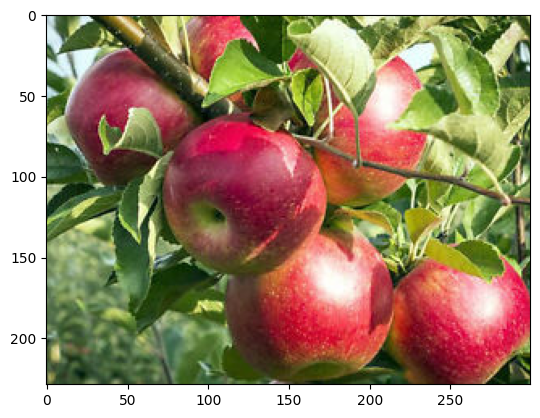

In [29]:
#Display image 
plt.imshow(image_rgb)

In [32]:
!python /kaggle/input/applai-cv-st23-assignment-4/train --img 640 --epochs 50 --batch 32 --data /kaggle/working/yolov5/data/data.yaml --cfg /kaggle/working/yolov8n/models/yolov8n.yaml --weights yolov8n.pt --name fruit_detection_yolov8

/opt/conda/bin/python: can't find '__main__' module in '/kaggle/input/applai-cv-st23-assignment-4/train'


## new yolo

In [36]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [37]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In [38]:
# Define the paths to the images and labels directories
train_images = "/kaggle/working/object_detection/train/images"
train_labels = "/kaggle/working/object_detection/train/labels"

test_images = "/kaggle/working/object_detection/test/images"
test_labels = "/kaggle/working/object_detection/test/labels"


In [40]:
height, width, channels = image_rgb.shape

In [47]:
 # Loading a pretrained model
model = YOLO('yolov8x.pt')


# Training the model
model.train(data = '/kaggle/input/upload/data2.yaml',
            epochs = 10,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

Ultralytics YOLOv8.0.168 🚀 Python-3.10.12 torch-2.0.0+cpu CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/upload/data2.yaml, epochs=10, patience=50, batch=8, imgsz=229, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optim

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: []
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78981a1e10c0>
fitness: 0.0
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([], dtype=float64)
names: {0: 'apple', 1: 'banana', 2: 'orange'}
plot: False
results_dict: {'metrics/precision(B)': 0.0, 'metrics/recall(B)': 0.0, 'metrics/mAP50(B)': 0.0, 'metrics/mAP50-95(B)': 0.0, 'fitness': 0.0}
save_dir: PosixPath('runs/detect/train7')
speed: {'preprocess': 0.16751686731974283, 'inference': 407.82672564188636, 'loss': 0.0002582867940266927, 'postprocess': 0.6006638209025066}

evalution

In [ ]:
#if i have validation

"""%matplotlib inline
# Loading the best performing model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')"""

In [ ]:
"""%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()"""

confussion matrix

In [ ]:
"""%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');"""

Making Predictions on Test Images


In [48]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img



0: 224x256 2 oranges, 448.9ms
Speed: 3.0ms preprocess, 448.9ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 256)

0: 256x256 2 apples, 3 bananas, 1 orange, 482.9ms
Speed: 1.5ms preprocess, 482.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 256)

0: 128x256 2 bananas, 288.0ms
Speed: 1.0ms preprocess, 288.0ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 256)

0: 256x256 1 apple, 463.2ms
Speed: 1.4ms preprocess, 463.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 apple, 470.1ms
Speed: 1.2ms preprocess, 470.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 apple, 462.7ms
Speed: 1.0ms preprocess, 462.7ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 256)

0: 192x256 1 banana, 1 orange, 373.5ms
Speed: 0.9ms preprocess, 373.5ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 256)

0: 160x256 3 bananas, 332.7ms
Speed: 0.9ms preprocess, 332.7ms inference,

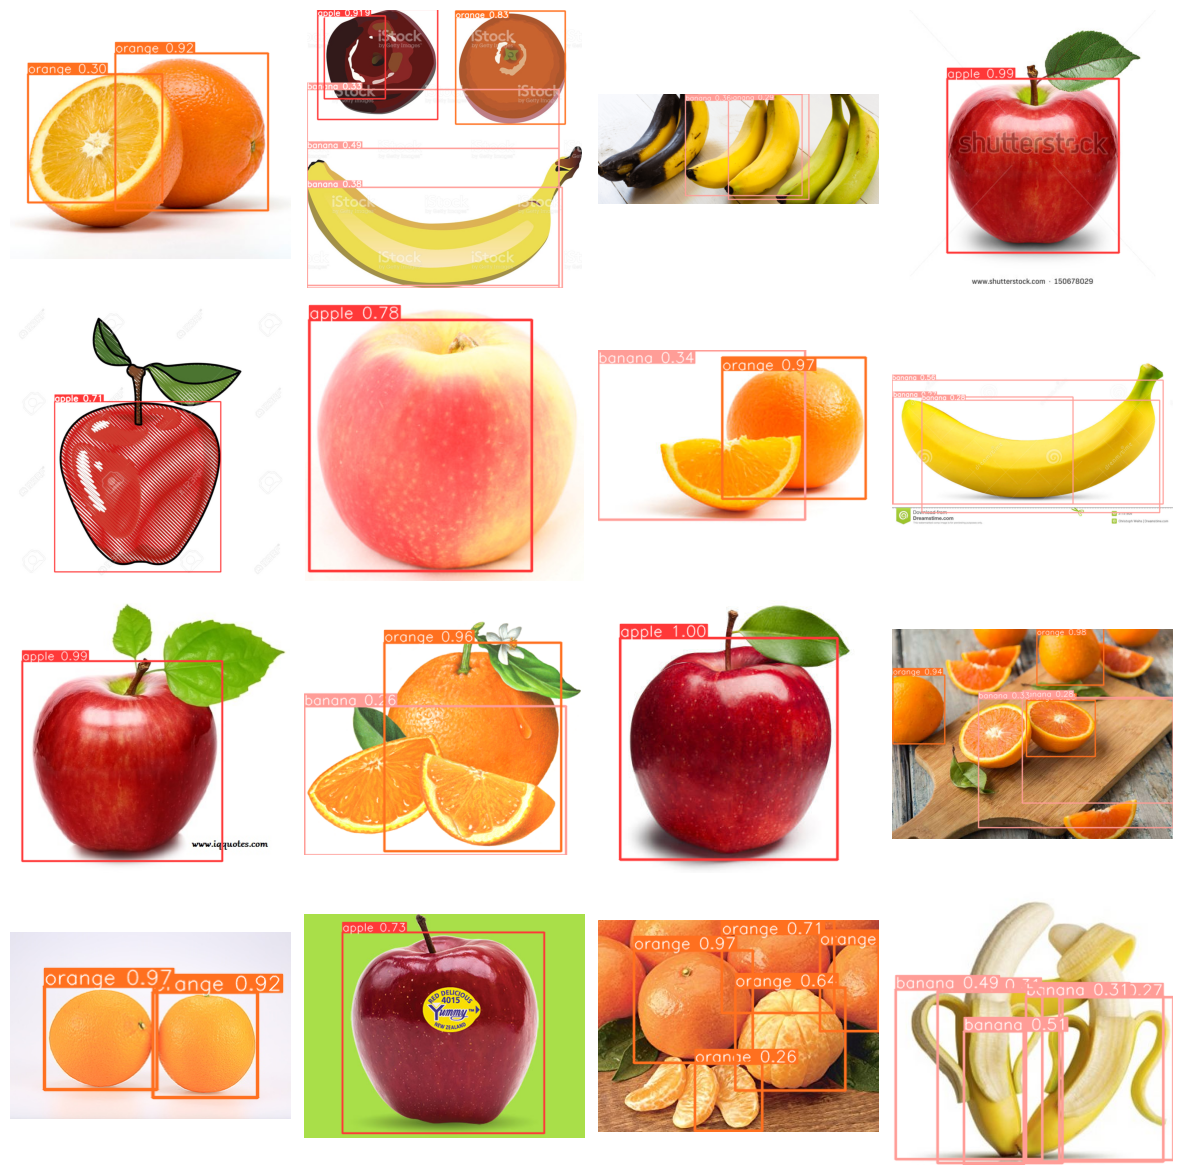

In [49]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/applai-cv-st23-assignment-4/test'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
